In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from sklearn.model_selection import train_test_split

### This model have some issues I'm working on improving it in due time , Though I'll appreciate some directions.

In [2]:
df = pd.DataFrame([
    [0,0,0],
    [1,0,1],
    [0,1,1],
    [1,1,0],
] * 1000)


In [3]:
df.columns = ['x1','x2','y']

In [4]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [5]:
df

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0
4,0,0,0
...,...,...,...
3995,1,1,0
3996,0,0,0
3997,1,0,1
3998,0,1,1


In [6]:
df['x1'] += np.random.normal(size=4000) * 0.1
df['x2'] += np.random.normal(size=4000) * 0.1


In [7]:
df

,x1,x2,y
0,-0.052982,0.031138,0
1,0.962159,-0.042566,1
2,0.138342,0.981773,1
3,0.816074,0.968956,0
4,0.007449,-0.068488,0
...,...,...,...
3995,0.925472,0.992485,0
3996,-0.188562,0.010277,0
3997,1.165395,0.077803,1
3998,-0.062411,0.848664,1


<Axes: xlabel='x1', ylabel='x2'>

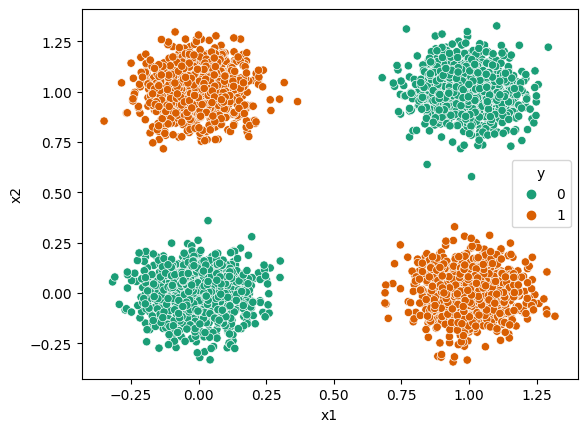

In [8]:
sns.scatterplot(data=df,x='x1', y='x2', hue='y', palette='Dark2')

In [9]:
X , test = train_test_split(df,test_size=0.3)

**Let's define a Sigmoid function**

In [10]:
def sig(z):
    return (1/(1 + np.exp(-2)))

**Matrix of the coefficients**

In [11]:
W = np.array([[1,-1,0.],[-1,1,0.]]) # Use dot to make it float for np
U = np.array([1,1,0])

In [12]:
W

array([[ 1., -1.,  0.],
       [-1.,  1.,  0.]])

In [13]:
# Learning rate 
lr = 0.001

In [14]:
for re in range(500):
    # keep the total error 
    total_error = 0.0
    # Gradient of the matrix U 
    DUf = U * 0.0
    # Gradient of the matrix U 
    DWf = W * 0.0
    
    # Coefficients of w1 w2 and b1 are from W[0]
    w11 , w21 , b1 = W[0]
    
    w12 , w22 , b2 = W[1]
    
    u1 , u2 , c  = U
    
    for index , row in X.iterrows():
        x1 , x2 , y = row
        A1 = sig(w11*x1 + w21*x2 + b1)
        A2 = sig(w12*x1 + w22*x2 + b2)
        A3 = sig(u1*A1 + u2*A2 + c)
        err = A3 - y
        DUf += err * np.array([A1,A2,1])
        DWf += err * np.array([u1 * A1*(1-A1), u2 * A2*(1-A2)]).reshape((2,1)) @ np.array([x1,x2,1]).reshape(1,3)
        total_error += err ** 2
        
    U = U - lr * DUf
    W = W - lr * DWf
    
    if re%10 == 0:
        print(re, total_error)

0 1099.9252076225184
10 1099.9252076225184
20 1099.9252076225184
30 1099.9252076225184
40 1099.9252076225184
50 1099.9252076225184
60 1099.9252076225184
70 1099.9252076225184
80 1099.9252076225184
90 1099.9252076225184
100 1099.9252076225184
110 1099.9252076225184
120 1099.9252076225184
130 1099.9252076225184
140 1099.9252076225184
150 1099.9252076225184
160 1099.9252076225184
170 1099.9252076225184
180 1099.9252076225184
190 1099.9252076225184
200 1099.9252076225184
210 1099.9252076225184
220 1099.9252076225184
230 1099.9252076225184
240 1099.9252076225184
250 1099.9252076225184
260 1099.9252076225184
270 1099.9252076225184
280 1099.9252076225184
290 1099.9252076225184
300 1099.9252076225184
310 1099.9252076225184
320 1099.9252076225184
330 1099.9252076225184
340 1099.9252076225184
350 1099.9252076225184
360 1099.9252076225184
370 1099.9252076225184
380 1099.9252076225184
390 1099.9252076225184
400 1099.9252076225184
410 1099.9252076225184
420 1099.9252076225184
430 1099.9252076225184

In [15]:
def predict(df):
    output = []
    # Coefficients of w1 w2 and b1 are from W[0]
    w11 , w21 , b1 = W[0]
    
    w12 , w22 , b2 = W[1]
    
    u1 , u2 , c  = U
    
    for index , row in df.iterrows():
        x1 , x2 , y = row
        A1 = sig(w11*x1 + w21*x2 + b1)
        A2 = sig(w12*x1 + w22*x2 + b2)
        A3 = sig(u1*A1 + u2*A2 + c)
        
        output.append(np.round(A3))
    
    return (pd.Series(output))
    
    

In [16]:
from sklearn.metrics import classification_report

print(classification_report(test['y'], predict(test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       608
           1       0.49      1.00      0.66       592

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.33      1200



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
